In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df=pd.read_csv("train.csv")

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1- What is the survival rate among passengers?

Analyze the overall percentage of passengers who survived (Survived column).

In [10]:
np.round(df['Survived'].value_counts()/len(df["Survived"])*100,0)

0    62.0
1    38.0
Name: Survived, dtype: float64

- According to the given data 62% will be die and 38% will be live

<p> ____________________________________________ </p>

2- How does survival rate vary by passenger class (Pclass)?

Compare survival rates across the different passenger classes (1st, 2nd, 3rd).

In [14]:
np.round(pd.crosstab(df['Survived'],df["Pclass"],normalize='columns')*100,0)

Pclass,1,2,3
Survived,,,
0,37.0,53.0,76.0
1,63.0,47.0,24.0


- According to this from pclass 1 37% will be die and 63% will be live
- from pclass 2 53% will be die and 47 % will be live
- from pclass 3 76% will be die and 24 % will be live

<p>_______________________________________________</p>

3- Is there a significant difference in survival rates between males and females (Sex)?

Examine the survival rate based on gender.

In [17]:
np.round(pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100,0)

Sex,female,male
Survived,,
0,26.0,81.0
1,74.0,19.0


- 26% female are die and 74% are live
- 81% male are die and only 19% are live

<p> _____________________________________________</p>

4- How does age (Age) affect the likelihood of survival?

Analyze whether younger or older passengers had higher survival rates.

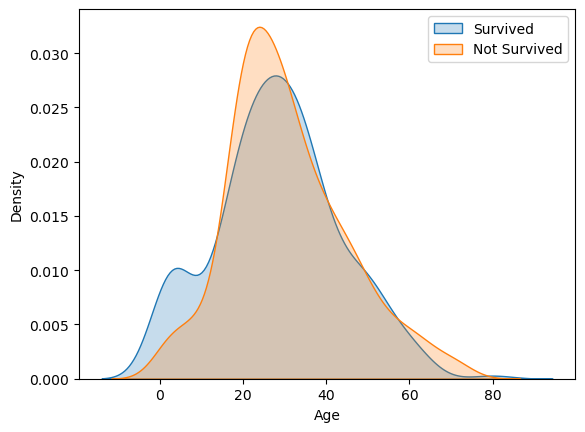

In [36]:
sns.kdeplot(df[df['Survived']==1]['Age'],label="Survived",shade=True)
sns.kdeplot(df[df["Survived"]==0]['Age'],label="Not Survived",shade=True)
plt.legend()
plt.show()

- According to the graph from 0.5 to 15 or 16 ages people are live and from 17 to 36 are die and then from 36 to 42 are live and then die

In [33]:
# Mean and median age of survivors
survivors = df[df['Survived'] == 1]
non_survivors = df[df['Survived'] == 0]

print(f"Mean age of survivors: {survivors['Age'].mean()}")
print(f"Median age of survivors: {survivors['Age'].median()}")

print(f"Mean age of non-survivors: {non_survivors['Age'].mean()}")
print(f"Median age of non-survivors: {non_survivors['Age'].median()}")

Mean age of survivors: 28.343689655172415
Median age of survivors: 28.0
Mean age of non-survivors: 30.62617924528302
Median age of non-survivors: 28.0


<p> ____________________________________________</P>

5- Did family size (combining SibSp and Parch) have any effect on survival?

Investigate how traveling with siblings, spouses, parents, or children influenced survival chances.

In [79]:
df["familly-size"]=df['SibSp'] + df['Parch'] + 1

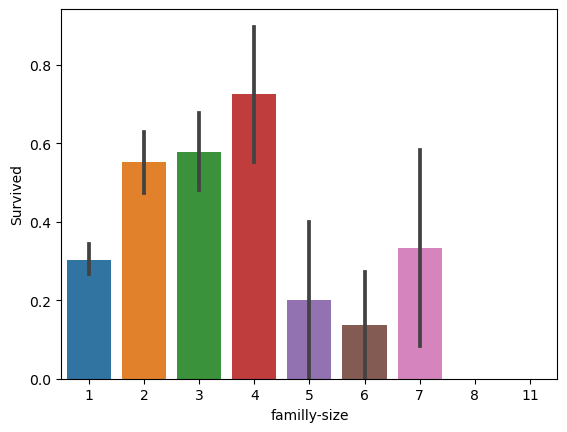

In [80]:
sns.barplot(x=df['familly-size'],y=df['Survived']);

In [47]:
np.round((df.groupby(['familly-size'])['Survived'].mean())*100,0)

familly-size
1     30.0
2     55.0
3     58.0
4     72.0
5     20.0
6     14.0
7     33.0
8      0.0
11     0.0
Name: Survived, dtype: float64

<p> ________________________________________________</p>

6- What is the distribution of ticket fares (Fare) among passengers, and does fare impact survival?

Look at the distribution of fares and compare survival rates for different fare ranges.

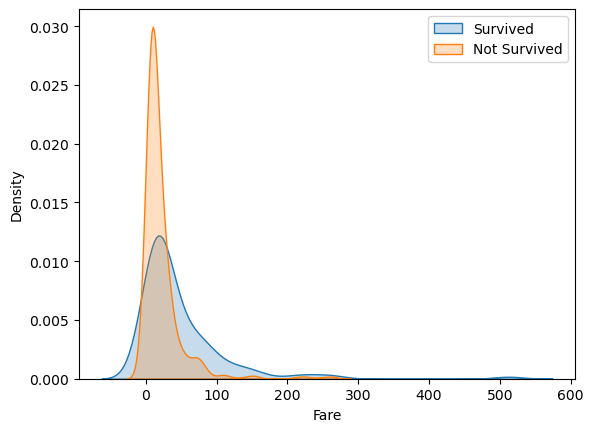

In [54]:
sns.kdeplot(df[df['Survived']==1]['Fare'],label='Survived',shade=True)
sns.kdeplot(df[df['Survived']==0]['Fare'],label='Not Survived',shade=True)
plt.legend()
plt.show()

- Graph clearlly show that fare increase the decrease the chance of die

<p> ________________________________________________</p>

7- How did the embarkation point (Embarked) affect survival rates?

Analyze if passengers boarding at different locations (C, Q, S) had different survival rates.

In [72]:
df['Embarked']=df['Embarked'].dropna()

In [73]:
df['Embarked'].isnull().sum()

2

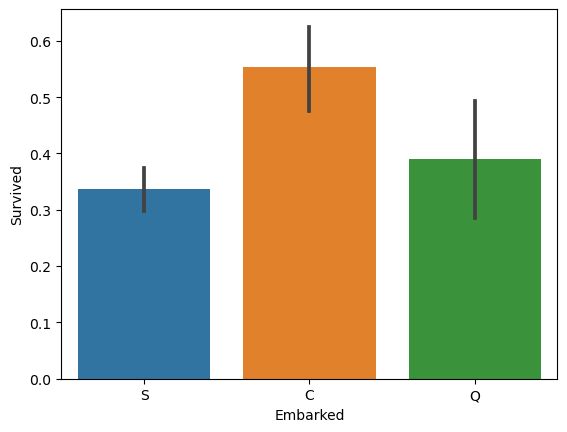

In [75]:
sns.barplot(x=df['Embarked'],y=df['Survived']);

- According to the given graph the C have more live

In [78]:
np.round(pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100,0)

Embarked,C,Q,S
Survived,,,
0,45.0,61.0,66.0
1,55.0,39.0,34.0


<p> _____________________________________________</p>

8- What was the survival rate of passengers based on cabin assignment (Cabin)?

Investigate whether having a cabin or its location played a role in survival.

In [60]:
np.round(df['Cabin'].isnull().sum()/len(df['Cabin'])*100,0)

77.0

- 77% are missing value so we can not say about that

<p> _____________________________________________</p>

9- Were passengers traveling alone (SibSp + Parch = 0) more or less likely to survive?

Compare the survival rates between passengers traveling alone versus those with family.

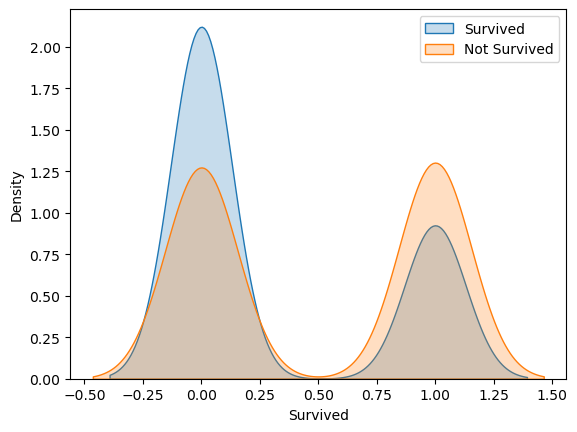

In [86]:
sns.kdeplot(df[df['familly-size']==1]['Survived'],label='Survived',shade=True)
sns.kdeplot(df[df['familly-size']>=2]['Survived'],label='Not Survived',shade=True)
plt.legend()
plt.show()

In [89]:
np.round(pd.crosstab(df['Survived'],df['familly-size'],normalize='columns')*100,0)

familly-size,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,70.0,45.0,42.0,28.0,80.0,86.0,67.0,100.0,100.0
1,30.0,55.0,58.0,72.0,20.0,14.0,33.0,0.0,0.0


<p> _____________________________________________</p>

10- Did ticket number (Ticket) or type of ticket (numeric vs. alphanumeric) correlate with survival?

Examine if there's any pattern in survival rates based on ticket types or specific numbers.

In [90]:
# Classify tickets as numeric or alphanumeric
df['TicketType'] = df['Ticket'].apply(lambda x: 'Numeric' if x.isdigit() else 'Alphanumeric')

# Display the first few rows to verify
df[['Ticket', 'TicketType']].head()

,Ticket,TicketType
0,A/5 21171,Alphanumeric
1,PC 17599,Alphanumeric
2,STON/O2. 3101282,Alphanumeric
3,113803,Numeric
4,373450,Numeric


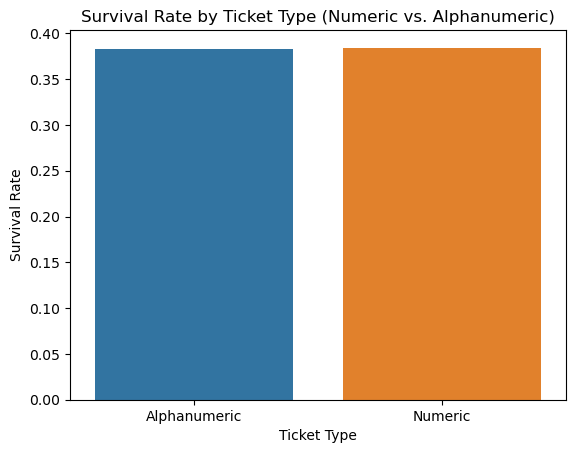

In [92]:
# Plot survival rate by ticket type
sns.barplot(x='TicketType', y='Survived', data=df, ci=None)

# Add labels and title
plt.title('Survival Rate by Ticket Type (Numeric vs. Alphanumeric)')
plt.xlabel('Ticket Type')
plt.ylabel('Survival Rate')

plt.show()

In [93]:
# Extract the numeric part of the ticket number (if present)
df['TicketNumeric'] = df['Ticket'].apply(lambda x: ''.join(filter(str.isdigit, x)) if any(c.isdigit() for c in x) else np.nan)

# Convert to numeric data type
df['TicketNumeric'] = pd.to_numeric(df['TicketNumeric'], errors='coerce')

# Display the first few rows to check the TicketNumeric column
df[['Ticket', 'TicketNumeric']].head()

,Ticket,TicketNumeric
0,A/5 21171,521171.0
1,PC 17599,17599.0
2,STON/O2. 3101282,23101282.0
3,113803,113803.0
4,373450,373450.0


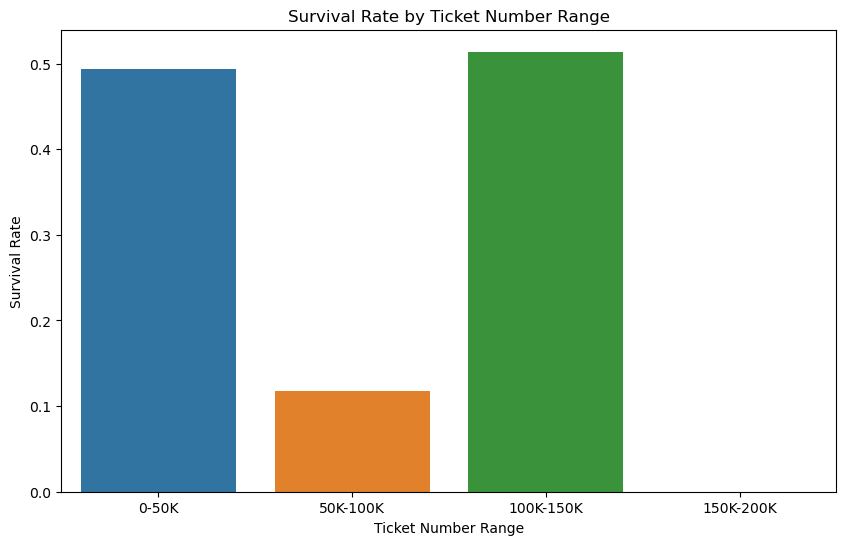

In [94]:
# Create ticket number ranges (bins)
bins = [0, 50000, 100000, 150000, 200000]
labels = ['0-50K', '50K-100K', '100K-150K', '150K-200K']

df['TicketRange'] = pd.cut(df['TicketNumeric'], bins=bins, labels=labels)

# Plot survival rate by ticket range
plt.figure(figsize=(10,6))
sns.barplot(x='TicketRange', y='Survived', data=df, ci=None)

# Add labels and title
plt.title('Survival Rate by Ticket Number Range')
plt.xlabel('Ticket Number Range')
plt.ylabel('Survival Rate')

plt.show()

In [95]:
# Survival rate for ticket type
ticket_type_survival = df.groupby('TicketType')['Survived'].mean()
print(ticket_type_survival)

# Survival rate for ticket number range
ticket_range_survival = df.groupby('TicketRange')['Survived'].mean()
print(ticket_range_survival)

TicketType
Alphanumeric    0.382609
Numeric         0.384266
Name: Survived, dtype: float64
TicketRange
0-50K        0.493540
50K-100K     0.117647
100K-150K    0.513889
150K-200K         NaN
Name: Survived, dtype: float64
